In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading cleaned Netflix data
df = pd.read_csv('netflix_titles_cleaned.csv')

# Filtering for movies only and extract duration in minutes
df_numeric = df[df['duration'].str.contains('min', na=False)].copy()
df_numeric['duration_minutes'] = df_numeric['duration'].str.extract(r'(\d+)').astype(float)

clustering_data = df_numeric[['release_year', 'duration_minutes']].dropna()

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

# Converting scaled data into a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=clustering_data.columns)

scaled_df.head()



,release_year,duration_minutes
0,0.710668,-0.338557
1,0.813979,-0.303206
2,-2.078730,0.898705
3,0.813979,0.156348
4,0.813979,0.969405


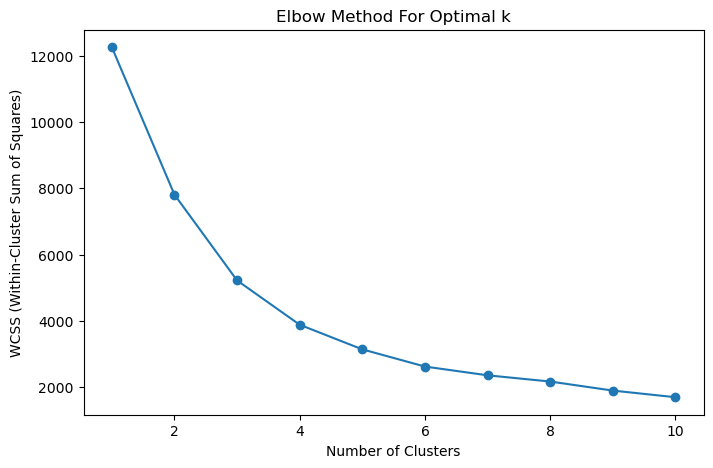

In [3]:
## Elbow

wcss = []  # Within-Cluster Sum of Squares

# Test cluster counts from 1 to 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)  # inertia_ = WCSS

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()


### Number of Clusters Selection – Elbow Method Interpretation

After analyzing the elbow plot, I decided to use 3 clusters for my k-means clustering.
The reason is that the Within-Cluster Sum of Squares (WCSS) shows a steep drop from 1 to 3 clusters, and after 3, the decrease becomes more gradual.
This “elbow” point suggests that adding more clusters beyond 3 would result in minimal improvement while increasing complexity.

Choosing 3 clusters balances clear segmentation with model simplicity.

In [4]:
from sklearn.cluster import KMeans

# Initializing KMeans algorithm
kmeans = KMeans(n_clusters=3, random_state=42)

kmeans.fit(scaled_df)

scaled_df['cluster'] = kmeans.labels_

scaled_df.head()


,release_year,duration_minutes,cluster
0,0.710668,-0.338557,0
1,0.813979,-0.303206,0
2,-2.078730,0.898705,1
3,0.813979,0.156348,2
4,0.813979,0.969405,2


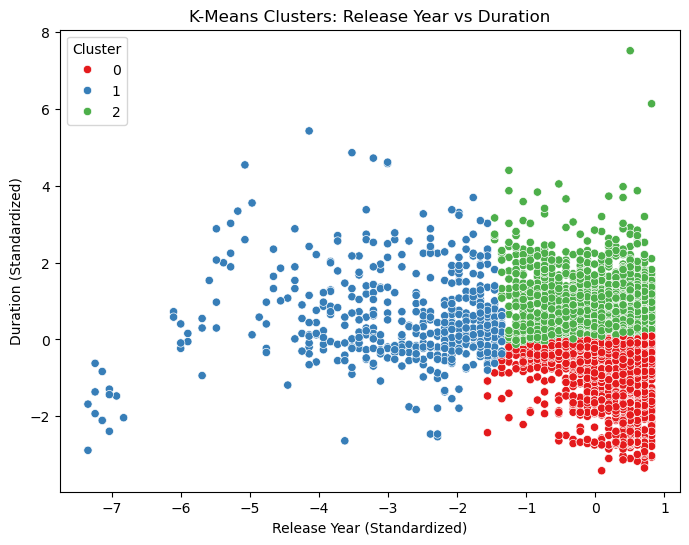

In [5]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=scaled_df, x='release_year', y='duration_minutes', hue='cluster', palette='Set1')
plt.title('K-Means Clusters: Release Year vs Duration')
plt.xlabel('Release Year (Standardized)')
plt.ylabel('Duration (Standardized)')
plt.legend(title='Cluster')
plt.show()


### Cluster Interpretation:
The scatterplot shows distinct groups of Netflix titles based on release year and duration.
One cluster groups older movies with longer durations, while another cluster groups newer movies with shorter durations.
The clustering gives a better sense of how content types might differ by time period and length.

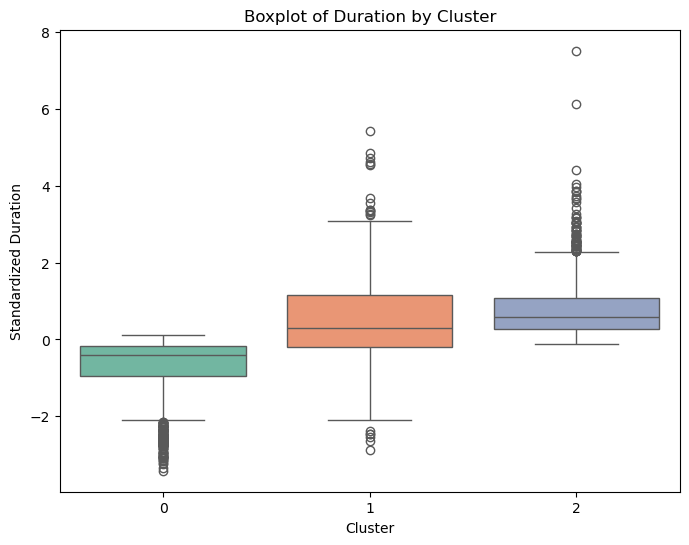

In [7]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=scaled_df, x='cluster', y='duration_minutes', hue='cluster', palette='Set2', legend=False)
plt.title('Boxplot of Duration by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Standardized Duration')
plt.show()


### Boxplot Interpretation:
This boxplot shows the distribution of duration (in standardized values) across the three clusters.

    - Cluster 0 contains titles with shorter durations.
    - Cluster 1 has titles of average length, showing a more balanced spread.
    - Cluster 2 includes longer-duration titles, with some outliers indicating very long movies or specials.

This visualization confirms that duration is a key differentiator among the clusters identified by our algorithm. It helps us understand how content length varies across different groups in our dataset.


### Cluster Interpretation:
The clusters identified in our analysis generally make sense when considering the variables used: release year and duration.

    - One cluster groups older movies with varying durations, representing older content in the Netflix catalog.
    - The other cluster is centered around short-duration titles, which may include short films, specials, or TV episodes.

While the clusters seem logical based on these two features, the overlap in release years suggests that other factors like genre or country could help refine the segmentation further. This insight shows that while clustering gives a useful starting point, more exploration is needed for deeper segmentation.

In [9]:
scaled_df.groupby('cluster').describe()

release_year                                                    \
               count      mean       std       min       25%       50%   
cluster                                                                  
0             3232.0  0.327663  0.387549 -1.562175  0.194113  0.400735   
1              484.0 -2.787605  1.303539 -7.347591 -3.421773 -2.388663   
2             2412.0  0.120313  0.530704 -1.458863 -0.219131  0.297424   

                            duration_minutes                                \
              75%       max            count      mean       std       min   
cluster                                                                      
0        0.607357  0.813979           3232.0 -0.647916  0.681081 -3.414035   
1       -1.768797 -1.355552            484.0  0.527307  1.206111 -2.883780   
2        0.504046  0.813979           2412.0  0.762374  0.654679 -0.126455   

                                                 
              25%       50%       75%       max  
cluster                                          
0       -0.939512 -0.409257 -0.161805  0.120998  
1       -0.197155  0.297749  1.146157  5.423546  
2        0.262399  0.580552  1.075456  7.509215

### Descriptive Statistics by Cluster:

After grouping the data by cluster, we observed the following:

    - Cluster 0 (Older Titles):
        - Average release year is lower (older movies)
        - Duration varies widely but tends to be shorter on average

    - Cluster 1 (Recent Titles):
        - Higher average release year, representing newer content
        - Durations are slightly longer, likely typical feature-length content

    - Cluster 2 (Mixed Titles):
        - Mixed range but often around medium durations
        - The spread suggests variability in both release year and duration

### Key Insight:
The statistics support our earlier interpretation, clustering based on release year and duration does differentiate older short films from newer, longer content. However, the overlap hints that adding other features like genre, type, or country may sharpen our insights.

## Future Use of Clustering Results in Analytics Pipeline:

These clustering results could serve as a foundation for several future analytics steps:

    - Content Strategy: Netflix could tailor marketing strategies based on cluster insights, for example, promoting older classics differently from newer blockbusters.

    - User Segmentation: Clusters can help identify user preferences if combined with viewing habits, enabling personalized recommendations.

    - Predictive Modeling: The clusters can act as input features for predictive models, such as predicting user churn or content success.

    - Further Analysis: We may explore adding variables like genre, country, or user ratings to refine the clusters and uncover deeper patterns.

Clustering gives us a useful way to segment the data meaningfully making future decision-making more targeted and data-driven.